### Đâu là bài viết có lượt tương tác lớn nhất trong bộ dữ liệu ?

### Các mốc thời gian trong ngày mà Fanpage thường xuyên đăng bài

### Số lượt tương tác trong các bài đăng thay đổi như thế nào?

### Đâu là các từ khóa xuất hiện nhiều nhất trong các bài đăng được thu thập?

### Sự tương quan giữa số lượng reactions với các trường khác như số lượng bình luận, độ dài bài viết?

In [20]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('data/vebay69/clean/posts_full.csv')

### Tổng quan về dữ liệu 

In [13]:
df.shape

(910, 34)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        910 non-null    int64  
 1   post_text                      910 non-null    object 
 2   shared_text                    24 non-null     object 
 3   time                           910 non-null    object 
 4   image                          883 non-null    object 
 5   image_lowquality               910 non-null    object 
 6   images                         909 non-null    object 
 7   images_description             909 non-null    object 
 8   images_lowquality              910 non-null    object 
 9   images_lowquality_description  910 non-null    object 
 10  likes                          910 non-null    int64  
 11  comments                       910 non-null    int64  
 12  shares                         910 non-null    int

Dữ liệu các bài post được lấy trong khoảng thời gian nào ?

In [14]:
df['time'].min(), df['time'].max()

('2022-05-06 07:37:28', '2023-11-20 05:28:02')

## Top 5 Post có nhiều lượt reaction nhất

In [18]:
top_5_max_reaction = df.nlargest(5, 'reaction_count')
top_5_max_reaction

,post_id,post_text,shared_text,time,image,image_lowquality,images,images_description,images_lowquality,images_lowquality_description,likes,comments,shares,link,links,user_id,shared_post_id,shared_time,shared_user_id,shared_username,shared_post_url,w3_fb_url,reaction_count,with,image_id,image_ids,fetched_time,like,love,haha,wow,care,sad,angry
711,5663428510443960,Ai chắc cũng đã từng\n#Panda,NaN,2022-09-26 04:48:56,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,['No photo description available.'],['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,['No photo description available.'],21311,6800,29000,NaN,[{'link': '/hashtag/panda?_ft_=encrypted_track...,772954189491441,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/vebay69/posts/5663428...,37754,NaN,5.663424e+15,['5663423580444453'],2023-11-21 07:35:39.721696,21311,87,11206,46,50,5041,13
622,5854513741335435,Na Ế trải lòng\n#Panda,NaN,2022-12-01 10:09:47,https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-4.xx.fbcdn.net/v/t39.3...,['No photo description available.'],['https://scontent-sin6-4.xx.fbcdn.net/v/t39.3...,['No photo description available.'],15223,4600,575,NaN,[{'link': '/hashtag/panda?_ft_=encrypted_track...,772954189491441,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/vebay69/posts/5854513...,26723,NaN,5.854512e+15,['5854512061335603'],2023-11-21 04:36:17.527989,15223,27,9689,12,25,1740,7
644,5808693772584099,Tin chuẩn chưa bro\n#Panda,NaN,2022-11-15 03:55:23,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,['No photo description available.'],['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,['No photo description available.'],15093,1500,217,NaN,[{'link': '/hashtag/panda?_ft_=encrypted_track...,772954189491441,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/vebay69/posts/5808693...,26325,NaN,5.808693e+15,['5808693099250833'],2023-11-21 04:39:24.949563,15093,23,10895,17,15,280,2
662,5775707419216068,Nổ stk đê\n#Panda,NaN,2022-11-03 10:30:35,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,['No photo description available.'],['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,['No photo description available.'],14921,2400,420,NaN,[{'link': '/hashtag/panda?_ft_=encrypted_track...,772954189491441,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/vebay69/posts/5775707...,24967,NaN,5.775707e+15,['5775706992549444'],2023-11-21 07:28:17.269693,14921,18,9661,15,17,335,0
423,6291401437646661,Nhưng mấy anh cứ giựt giựt ấy\n#Panda,NaN,2023-04-21 03:34:58,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,['No photo description available.'],['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,['No photo description available.'],9717,4400,529,NaN,[{'link': '/hashtag/panda?_ft_=encrypted_track...,772954189491441,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/vebay69/posts/6291401...,24928,NaN,6.291400e+15,['6291400490980089'],2023-11-21 00:30:12.890458,9717,114,14508,90,77,422,0


In [19]:
top_5_min_reaction = df.nsmallest(5, 'reaction_count')
top_5_min_reaction

,post_id,post_text,shared_text,time,image,image_lowquality,images,images_description,images_lowquality,images_lowquality_description,likes,comments,shares,link,links,user_id,shared_post_id,shared_time,shared_user_id,shared_username,shared_post_url,w3_fb_url,reaction_count,with,image_id,image_ids,fetched_time,like,love,haha,wow,care,sad,angry
466,6238158042971001,Hy vọng mèo 2023 là mèo thần tài 😁,GAME8.VN\nBột tranh hài hước về sự khác biệt g...,2023-04-03 06:00:02,NaN,https://external-sin6-2.xx.fbcdn.net/emg1/v/t1...,[],[],['https://external-sin6-2.xx.fbcdn.net/emg1/v/...,[None],2,0,0,https://game8.vn/giai-tri/bot-tranh-hai-huoc-v...,[{'link': '/story.php?story_fbid=pfbid02y41G22...,772954189491441,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/vebay69/posts/6238158...,4,NaN,NaN,[],2023-11-21 00:36:49.798205,2,0,2,0,0,0,0
465,6238625046257634,Này để chọc mấy người 1m8 à? 😁,GAME8.VN\nLoạt tranh hài hước về chú hươu cao ...,2023-04-03 10:30:03,NaN,https://external-sin6-2.xx.fbcdn.net/emg1/v/t1...,[],[],['https://external-sin6-2.xx.fbcdn.net/emg1/v/...,[None],3,3,3,https://game8.vn/giai-tri/loat-tranh-hai-huoc-...,[{'link': '/story.php?story_fbid=pfbid02EEMAqj...,772954189491441,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/vebay69/posts/6238625...,7,NaN,NaN,[],2023-11-21 00:36:45.146711,3,0,3,0,0,1,0
517,6150474095072730,Superhero này siuuuu :v,GAME8.VN\nCác siêu anh hùng sẽ làm gì nếu khôn...,2023-03-05 10:30:03,NaN,https://external-sin6-4.xx.fbcdn.net/emg1/v/t1...,[],[],['https://external-sin6-4.xx.fbcdn.net/emg1/v/...,[None],8,33,3,https://game8.vn/giai-tri/cac-sieu-anh-hung-se...,[{'link': '/story.php?story_fbid=pfbid0Ay67Lxk...,772954189491441,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/vebay69/posts/6150474...,8,NaN,NaN,[],2023-11-21 03:50:24.159291,8,0,0,0,0,0,0
470,6233068110146661,Ôi tuổi thơ 😂,GAME8.VN\nHóa ra bộ truyện Doraemon đã lừa độc...,2023-04-01 10:30:01,NaN,https://external-sin6-2.xx.fbcdn.net/emg1/v/t1...,[],[],['https://external-sin6-2.xx.fbcdn.net/emg1/v/...,[None],7,0,1,https://game8.vn/giai-tri/hoa-ra-bo-truyen-dor...,[{'link': '/story.php?story_fbid=pfbid02TD2QZk...,772954189491441,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/vebay69/posts/6233068...,10,NaN,NaN,[],2023-11-21 00:46:09.110965,7,0,2,0,0,1,0
471,6232543603532445,Sao lại mang toàn thú cưng ra minh họa thế này? 😆,GAME8.VN\nLoạt tranh nhảm nhí cho thấy đàn ông...,2023-04-01 06:00:01,NaN,https://external-sin6-2.xx.fbcdn.net/emg1/v/t1...,[],[],['https://external-sin6-2.xx.fbcdn.net/emg1/v/...,[None],10,11,0,https://game8.vn/giai-tri/loat-tranh-nham-nhi-...,[{'link': '/story.php?story_fbid=pfbid0zmiQZ4K...,772954189491441,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/vebay69/posts/6232543...,12,NaN,NaN,[],2023-11-21 00:46:17.592332,10,0,2,0,0,0,0


In [22]:
df.rename(columns={'reaction_count': 'total_react'}, inplace=True)

In [25]:
df[['total_react', 'comments', 'shares', 'like', 'love', 'haha', 'wow', 'care', 'sad', 'angry']].describe().astype(int)

,total_react,comments,shares,like,love,haha,wow,care,sad,angry
count,910,910,910,910,910,910,910,910,910,910
mean,5043,280,72,3440,19,1511,6,5,60,0
std,4479,592,963,2851,150,1974,45,16,229,3
min,4,0,0,2,0,0,0,0,0,0
25%,1993,46,7,1316,2,331,1,1,4,0
50%,3668,99,16,2627,5,765,3,3,14,0
75%,6650,261,40,4636,10,1764,6,5,45,0
max,37754,7500,29000,21311,4205,14508,1354,333,5041,86


In [28]:
df_sorted = df.sort_values('time')
df_sorted.head()

,post_id,post_text,shared_text,time,image,image_lowquality,images,images_description,images_lowquality,images_lowquality_description,likes,comments,shares,link,links,user_id,shared_post_id,shared_time,shared_user_id,shared_username,shared_post_url,w3_fb_url,total_react,with,image_id,image_ids,fetched_time,like,love,haha,wow,care,sad,angry
909,5262746583845490,Ông con Enh Guốc :)\n#Panda,NaN,2022-05-06 07:37:28,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,['No photo description available.'],['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,['No photo description available.'],1735,49,12,NaN,[{'link': '/hashtag/panda?_ft_=encrypted_track...,772954189491441,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/vebay69/posts/5262746...,2921,NaN,5.262745e+15,['5262745410512274'],2023-11-21 08:29:09.776214,1735,5,1146,1,1,33,0
908,5263709253749223,Aizz chán ba ghê ớ..\n#Lìquầnxòi,NaN,2022-05-06 15:11:37,https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-4.xx.fbcdn.net/v/t39.3...,['No photo description available.'],['https://scontent-sin6-4.xx.fbcdn.net/v/t39.3...,['No photo description available.'],1028,16,2,NaN,[{'link': '/hashtag/lìquầnxòi?_ft_=encrypted_t...,772954189491441,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/vebay69/posts/5263709...,1527,NaN,5.263708e+15,['5263708363749312'],2023-11-21 08:29:00.486643,1028,2,490,1,0,6,0
907,5266711463449002,Nhìn bạn cũng C.h.i.ế.n đấy :)\n#panda,NaN,2022-05-07 15:36:30,https://scontent-sin6-3.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-3.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-3.xx.fbcdn.net/v/t39.3...,"[""Có thể là hình minh họa về văn bản cho biết ...",['https://scontent-sin6-3.xx.fbcdn.net/v/t39.3...,"[""Có thể là hình minh họa về văn bản cho biết ...",1142,75,22,NaN,[{'link': '/hashtag/panda?_ft_=encrypted_track...,772954189491441,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/vebay69/posts/5266711...,2372,NaN,5.266711e+15,['5266710616782420'],2023-11-21 08:28:49.211488,1142,4,1210,1,0,15,0
906,5269137123206436,Happy mother's day <3\n#Lìquầnxòi,NaN,2022-05-08 11:52:42,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,['No photo description available.'],['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,['No photo description available.'],758,23,9,NaN,[{'link': '/hashtag/lìquầnxòi?_ft_=encrypted_t...,772954189491441,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/vebay69/posts/5269137...,1391,NaN,5.269136e+15,['5269135959873219'],2023-11-21 08:28:37.570599,758,13,612,0,2,6,0
905,5271002853019863,Chính tôi :)\n#Panda,NaN,2022-05-09 04:02:31,https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-4.xx.fbcdn.net/v/t39.3...,['No photo description available.'],['https://scontent-sin6-4.xx.fbcdn.net/v/t39.3...,['No photo description available.'],869,81,30,NaN,[{'link': '/hashtag/panda?_ft_=encrypted_track...,772954189491441,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/vebay69/posts/5271002...,1539,NaN,5.271003e+15,['5271002636353218'],2023-11-21 08:28:30.041904,869,3,646,0,0,20,1


<Axes: title={'center': 'Total Reaction'}, xlabel='time'>

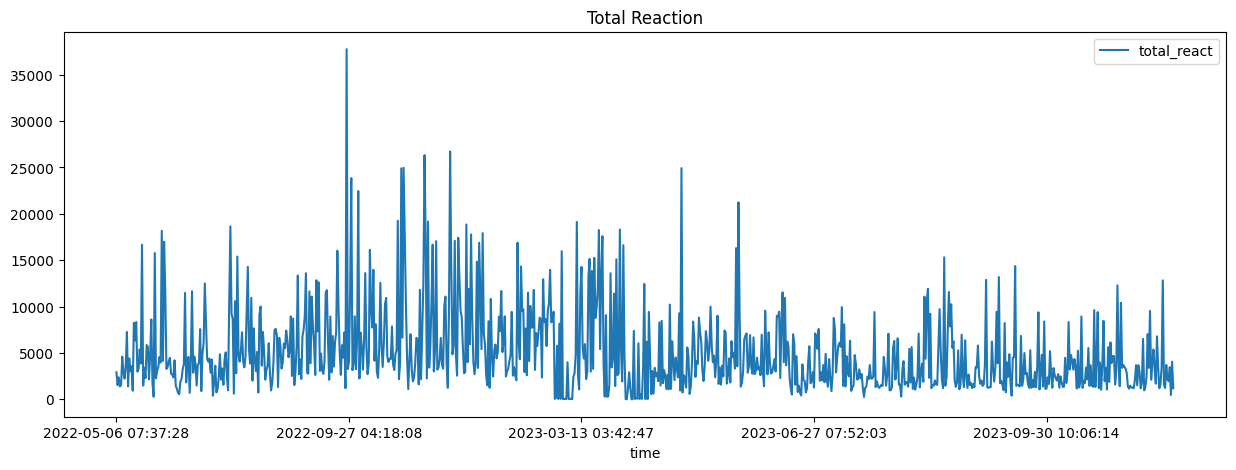

In [30]:
df_sorted.plot(x='time', y='total_react', kind='line', figsize=(15, 5), title='Total Reaction')

<Axes: title={'center': 'Number of like'}, xlabel='time'>

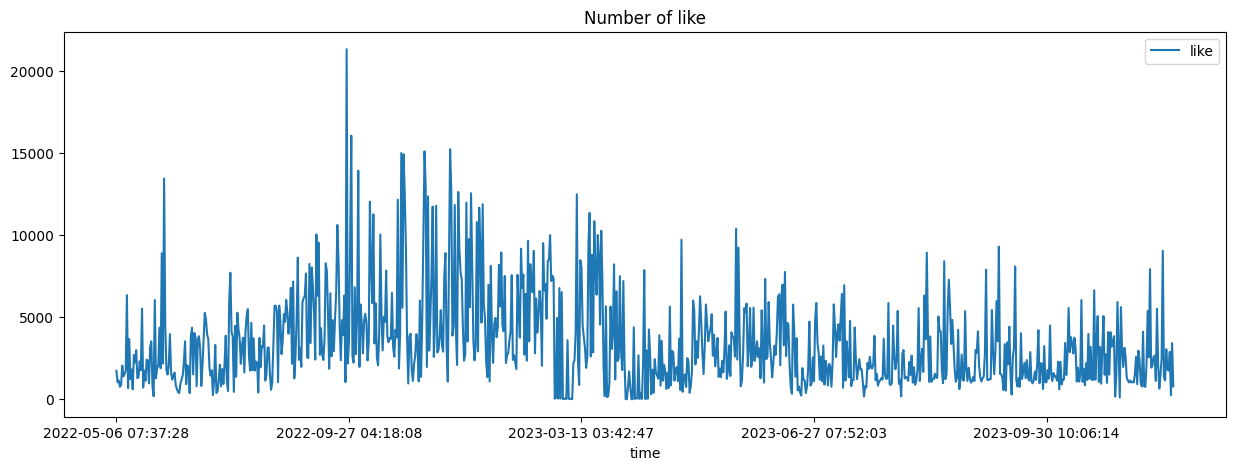

In [34]:
df_sorted.plot(x='time', y='like', kind='line', figsize=(15, 5), title='Number of like')

<Axes: title={'center': 'Number of haha'}, xlabel='time'>

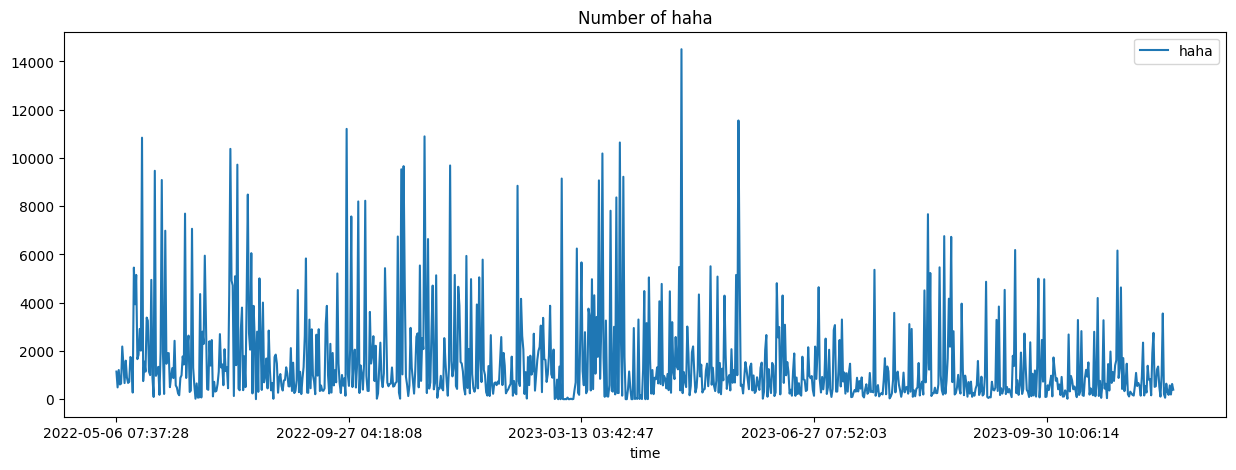

In [35]:
df_sorted.plot(x='time', y='haha', kind='line', figsize=(15, 5), title='Number of haha')

<Axes: title={'center': 'Number of angry'}, xlabel='time'>

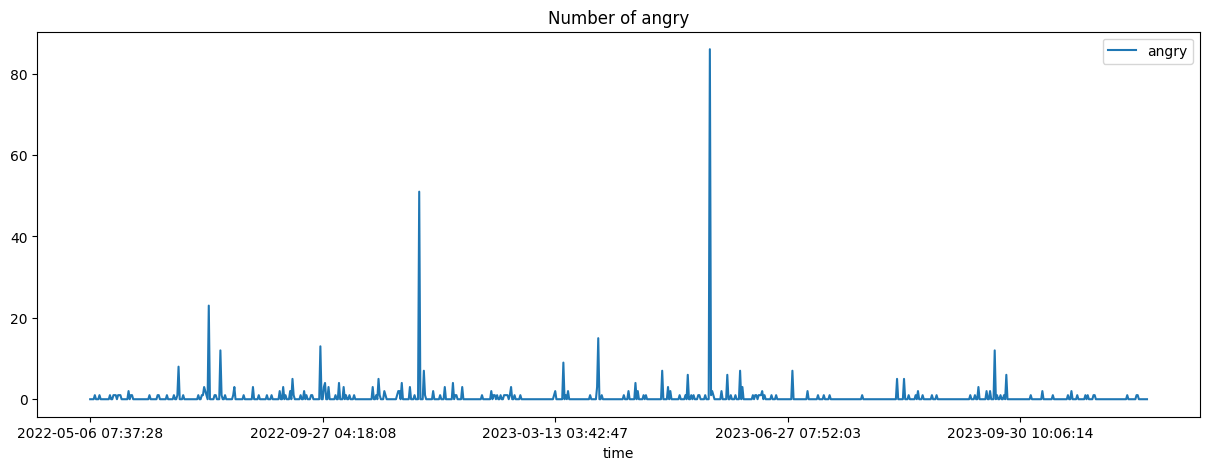

In [36]:
df_sorted.plot(x='time', y='angry', kind='line', figsize=(15, 5), title='Number of angry')

<Axes: xlabel='total_react', ylabel='comments'>

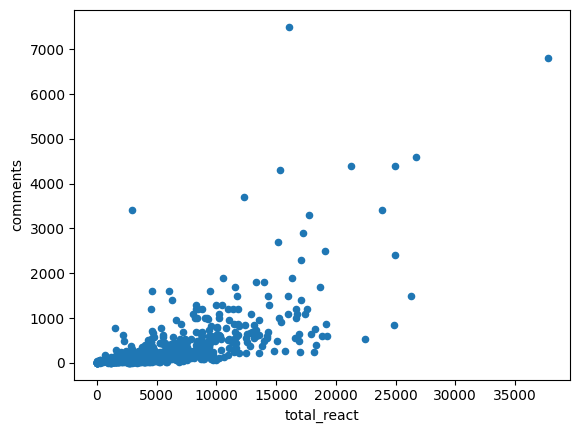

In [38]:
df.plot(x='total_react', y='comments', kind='scatter')

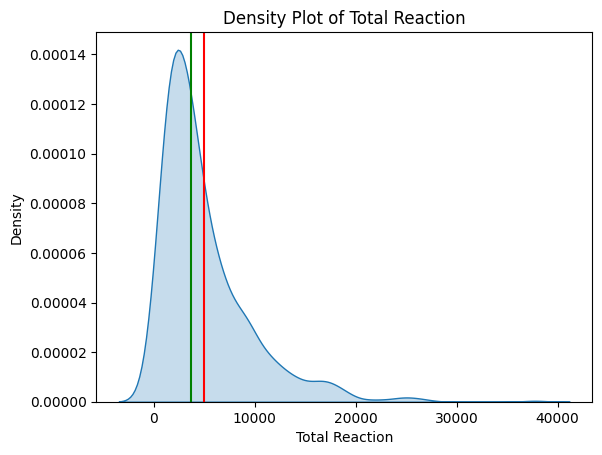

In [45]:
sns.kdeplot(data=df['total_react'], fill=True)
plt.axvline(df['total_react'].mean(), color='red')
plt.axvline(df['total_react'].median(), color='green')
plt.xlabel('Total Reaction')
plt.ylabel('Density')
plt.title('Density Plot of Total Reaction')
plt.show()